<a href="https://colab.research.google.com/github/rajeshkumar-niet/Machine_Learning/blob/main/Models/Big_Mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dependencies

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

###Data Read

In [49]:
mart_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/big_mart_data.csv')

In [50]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
mart_data.shape

(8523, 12)

In [52]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [53]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


###Handling Missing Values

In [54]:
mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [55]:
# Handling Missing Values
mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(), inplace=True)

In [56]:
mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [57]:
mode_of_outlet_size = mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [58]:
missing_values = mart_data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [59]:
mart_data.loc[missing_values, 'Outlet_Size'] = mart_data.loc[missing_values, 'Outlet_Type'
            ].apply(lambda outlet_type: mode_of_outlet_size[outlet_type])

In [60]:
mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


### Data Analysis


In [61]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [62]:
sns.set()

<Figure size 600x600 with 0 Axes>

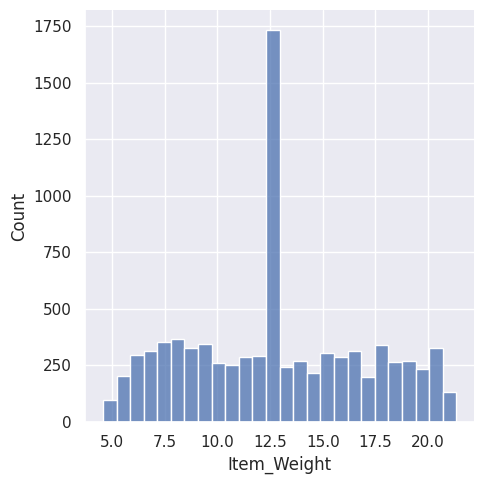

In [113]:
# Distribution of Item_weight
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

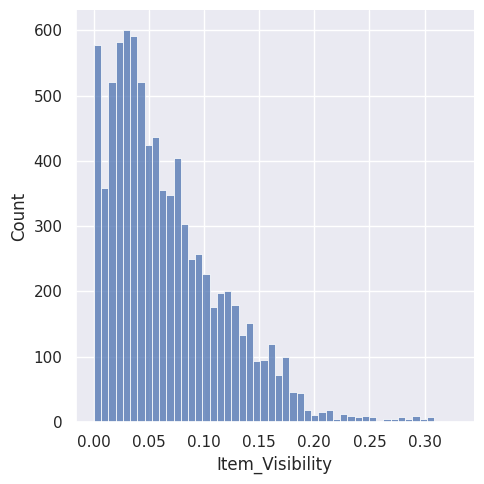

In [64]:
# Distribution of Item_Visibility
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

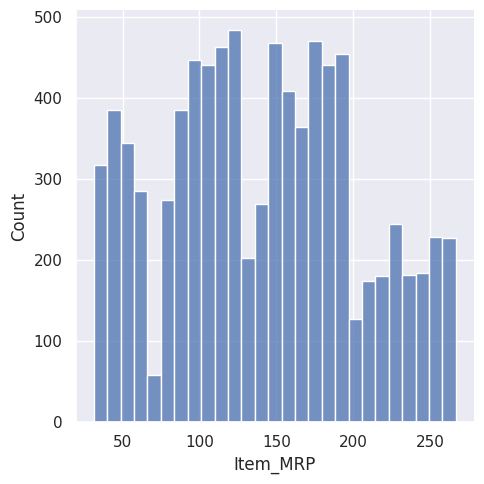

In [65]:
# Distribution of Item_MRP
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

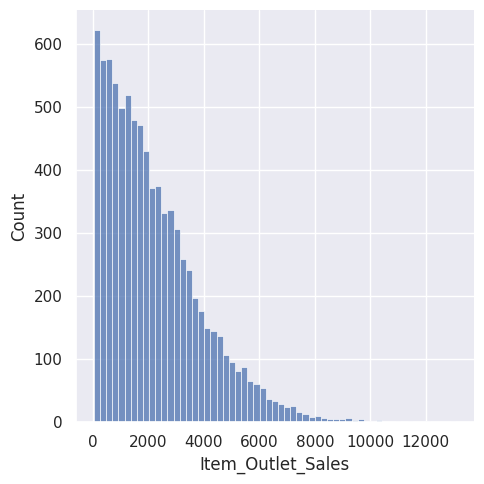

In [66]:
# Distribution of Item_Outlet_Sales
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Outlet_Sales'])
plt.show()

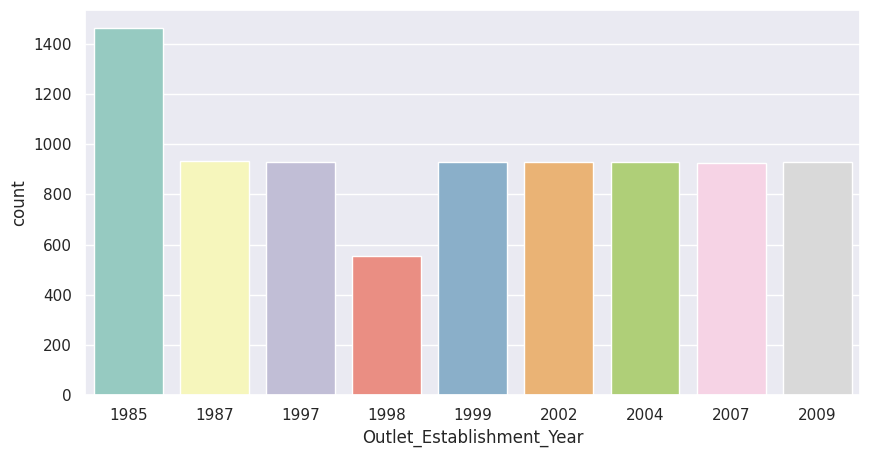

In [89]:
# Outlet_Establishment_Year
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data=mart_data, hue='Outlet_Establishment_Year', palette='Set3', legend=False)
plt.show()

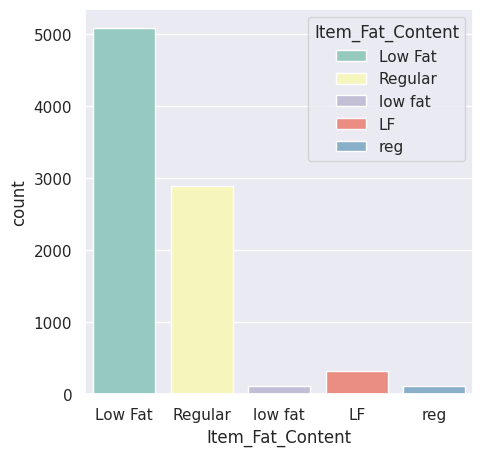

In [90]:
# Item_Fat_Content
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=mart_data, hue='Item_Fat_Content', palette='Set3', legend=True)
plt.show()

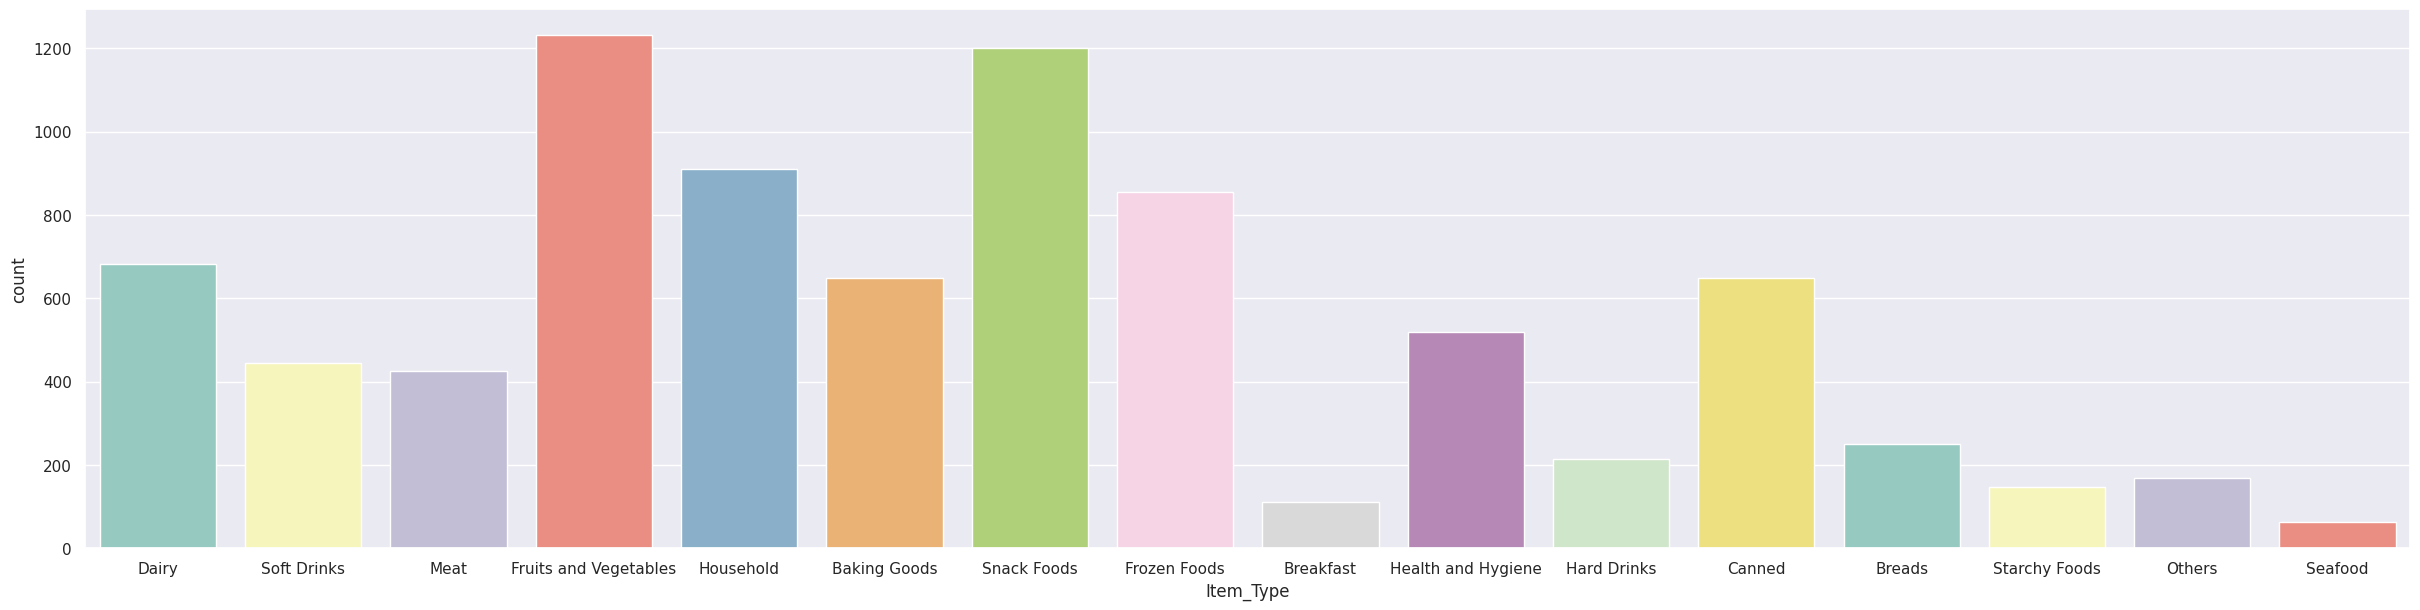

In [91]:
# Item_Type
plt.figure(figsize=(30,7))
sns.countplot(x='Item_Type', data=mart_data, hue='Item_Type', palette='Set3', legend=False)
plt.show()

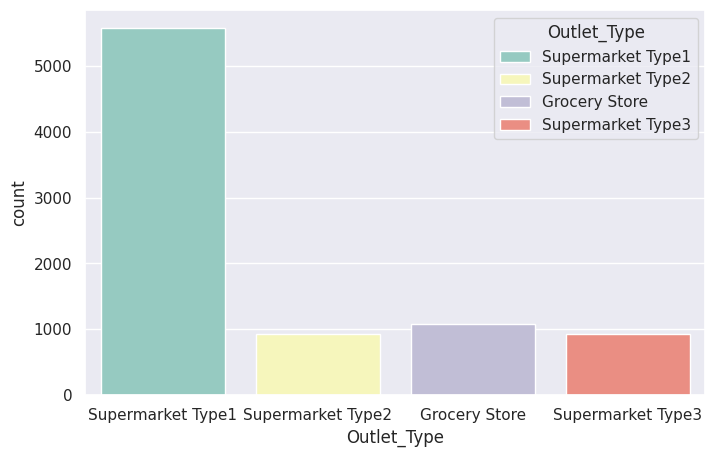

In [97]:
# Outlet_Type
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type', data=mart_data, hue='Outlet_Type', palette='Set3', legend=True)
plt.show()

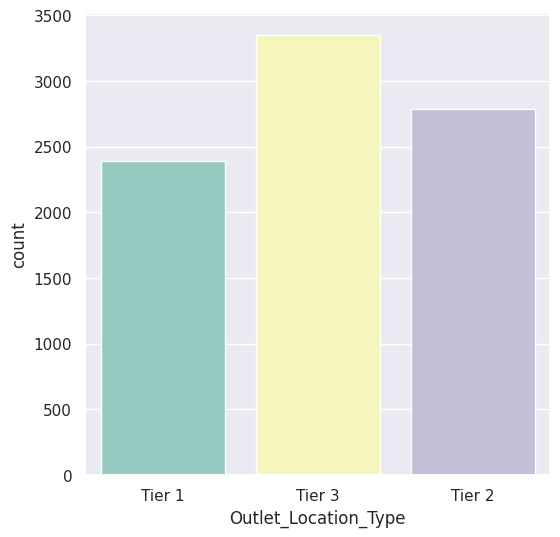

In [104]:
# Outlet_Location_Type
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=mart_data, hue='Outlet_Location_Type', palette='Set3' )
plt.show()

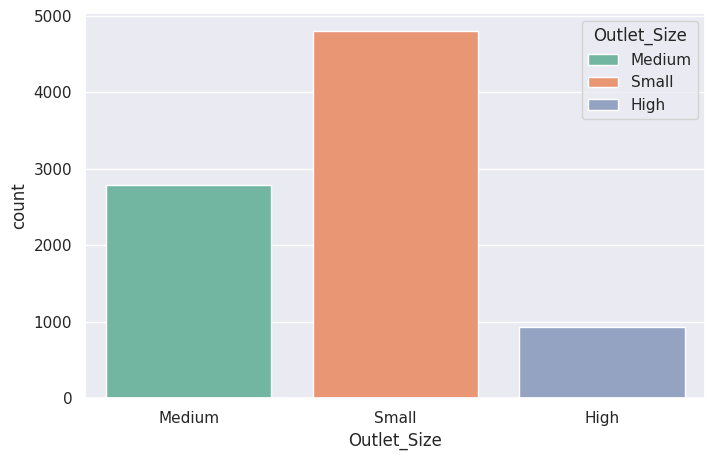

In [109]:
# Outlet_Size
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Size', data=mart_data, hue='Outlet_Size', palette='Set2', legend=True)
plt.show()

### Data Preprocessing


In [114]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [115]:
mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [118]:
mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


###Label Encoding

In [119]:
# Label Encoding
encoder = LabelEncoder()

In [126]:
mart_data['Item_Identifier'] = encoder.fit_transform(mart_data['Item_Identifier'])
mart_data['Item_Type'] = encoder.fit_transform(mart_data['Item_Type'])
mart_data['Outlet_Identifier'] = encoder.fit_transform(mart_data['Outlet_Identifier'])
mart_data['Outlet_Size'] = encoder.fit_transform(mart_data['Outlet_Size'])
mart_data['Outlet_Location_Type'] = encoder.fit_transform(mart_data['Outlet_Location_Type'])
mart_data['Outlet_Type'] = encoder.fit_transform(mart_data['Outlet_Type'])
mart_data['Item_Fat_Content'] = encoder.fit_transform(mart_data['Item_Fat_Content'])

In [127]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [128]:
X = mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = mart_data['Item_Outlet_Sales']

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [141]:
print("X Shape ", X.shape)
print("Y Shape ", Y.shape)
print("X_train Shape " , X_train.shape)
print("X_test Shape " , X_test.shape)
print("Y_train Shape " , Y_train.shape)
print("Y_test Shape " , Y_test.shape)

X Shape  (8523, 11)
Y Shape  (8523,)
X_train Shape  (6392, 11)
X_test Shape  (2131, 11)
Y_train Shape  (6392,)
Y_test Shape  (2131,)


###Model Training

In [142]:
regresser = XGBRegressor()
regresser.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [143]:
training_data_prediction = regresser.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R2 Score :', round(r2_train*100,2))

R2 Score : 87.75


In [144]:
testing_data_prediction = regresser.predict(X_test)
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print('R2 Score :', round(r2_test*100,2))

R2 Score : 53.95
